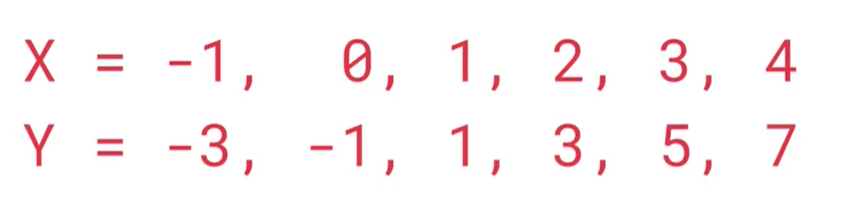

Given data above, make a model of NN out of it!

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [10]:
X = np.array([-1, 0, 1, 2, 3, 4]).reshape(-1,1)
y = np.array([-3, -1, 1, 3, 5, 7])

def get_model():
    model = keras.Sequential([
        keras.layers.Dense(1)
    ])
    model.compile("adam", loss=keras.losses.MSE)
    return model

In [26]:
model=get_model()
model.fit(X,y, epochs=500, verbose=0)

model.history.history["loss"][-1]

4.904369354248047

In [28]:
#predict X=5
model.predict(np.array(5).reshape(-1))

1/1 [==============================] - 0s 60ms/step


array([[4.0813456]], dtype=float32)

# This one's still basic, and we all know it!

Let's make it better, i think

In [68]:
class thecallback(keras.callbacks.Callback):
    def __init__(self):
        super(thecallback, self).__init__()
    def on_epoch_end(self, epoch, logs=None):
        logged = logs["val_mean_squared_error"]
        if logged < 0.05:
            self.model.stop_training=True

In [ ]:
def get_model():
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(16, activation="linear"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="linear"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="linear")
    ])
    model.compile("adam", loss=keras.losses.MSE, metrics=keras.metrics.MSE)
    return model

model=get_model()
model.fit(X,y, validation_split= 0.2, epochs=1000, verbose=1, callbacks=thecallback())

In [70]:
[np.round(i) for i in model.predict(np.array(5).reshape(-1))]

1/1 [==============================] - 0s 75ms/step


[array([9.], dtype=float32)]